In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/tcvwgixnh9ixecd/car_price_pred.csv?dl=0'

In [3]:
train = pd.read_csv('train.csv')
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
y = train['price']
X = train.drop(columns=['price'])

In [5]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

categ_data = X.select_dtypes([np.object0])
cat_features = categ_data.columns

/tmp/ipykernel_37/621112969.py:4: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  categ_data = X.select_dtypes([np.object0])


In [6]:

mean_encode = train.groupby('CarName')['price'].mean()
train.loc[:, 'CarName_mean_enc'] = train['CarName'].map(mean_encode)

mean_encode = train.groupby('fueltype')['price'].mean()
train.loc[:, 'fueltype_mean_enc'] = train['fueltype'].map(mean_encode)

mean_encode = train.groupby('aspiration')['price'].mean()
train.loc[:, 'aspiration_mean_enc'] = train['aspiration'].map(mean_encode)

mean_encode = train.groupby('doornumber')['price'].mean()
train.loc[:, 'doornumber_mean_enc'] = train['doornumber'].map(mean_encode)

mean_encode = train.groupby('carbody')['price'].mean()
train.loc[:, 'carbody_mean_enc'] = train['carbody'].map(mean_encode)

mean_encode = train.groupby('drivewheel')['price'].mean()
train.loc[:, 'drivewheel_mean_enc'] = train['drivewheel'].map(mean_encode)

mean_encode = train.groupby('enginelocation')['price'].mean()
train.loc[:, 'enginelocation_mean_enc'] = train['enginelocation'].map(mean_encode)

mean_encode = train.groupby('enginetype')['price'].mean()
train.loc[:, 'enginetype_mean_enc'] = train['enginetype'].map(mean_encode)

mean_encode = train.groupby('cylindernumber')['price'].mean()
train.loc[:, 'cylindernumber_mean_enc'] = train['cylindernumber'].map(mean_encode)

mean_encode = train.groupby('fuelsystem')['price'].mean()
train.loc[:, 'fuelsystem_mean_enc'] = train['fuelsystem'].map(mean_encode)

In [7]:
y = train['price']
X = train.drop(columns=['price'])

In [8]:

X = X.drop(columns = cat_features)

/tmp/ipykernel_37/1802517053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

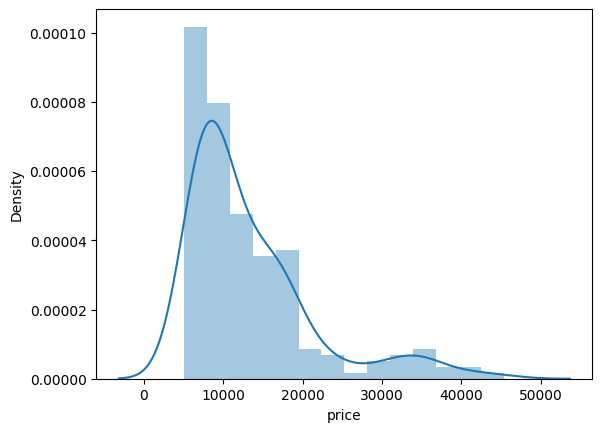

In [9]:
sns.distplot(y)

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

scal = StandardScaler()
scaled_X = scal.fit_transform(X)

In [11]:
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [12]:
X.dtypes

car_ID                     float64
symboling                  float64
wheelbase                  float64
carlength                  float64
carwidth                   float64
carheight                  float64
curbweight                 float64
enginesize                 float64
boreratio                  float64
stroke                     float64
compressionratio           float64
horsepower                 float64
peakrpm                    float64
citympg                    float64
highwaympg                 float64
CarName_mean_enc           float64
fueltype_mean_enc          float64
aspiration_mean_enc        float64
doornumber_mean_enc        float64
carbody_mean_enc           float64
drivewheel_mean_enc        float64
enginelocation_mean_enc    float64
enginetype_mean_enc        float64
cylindernumber_mean_enc    float64
fuelsystem_mean_enc        float64
dtype: object

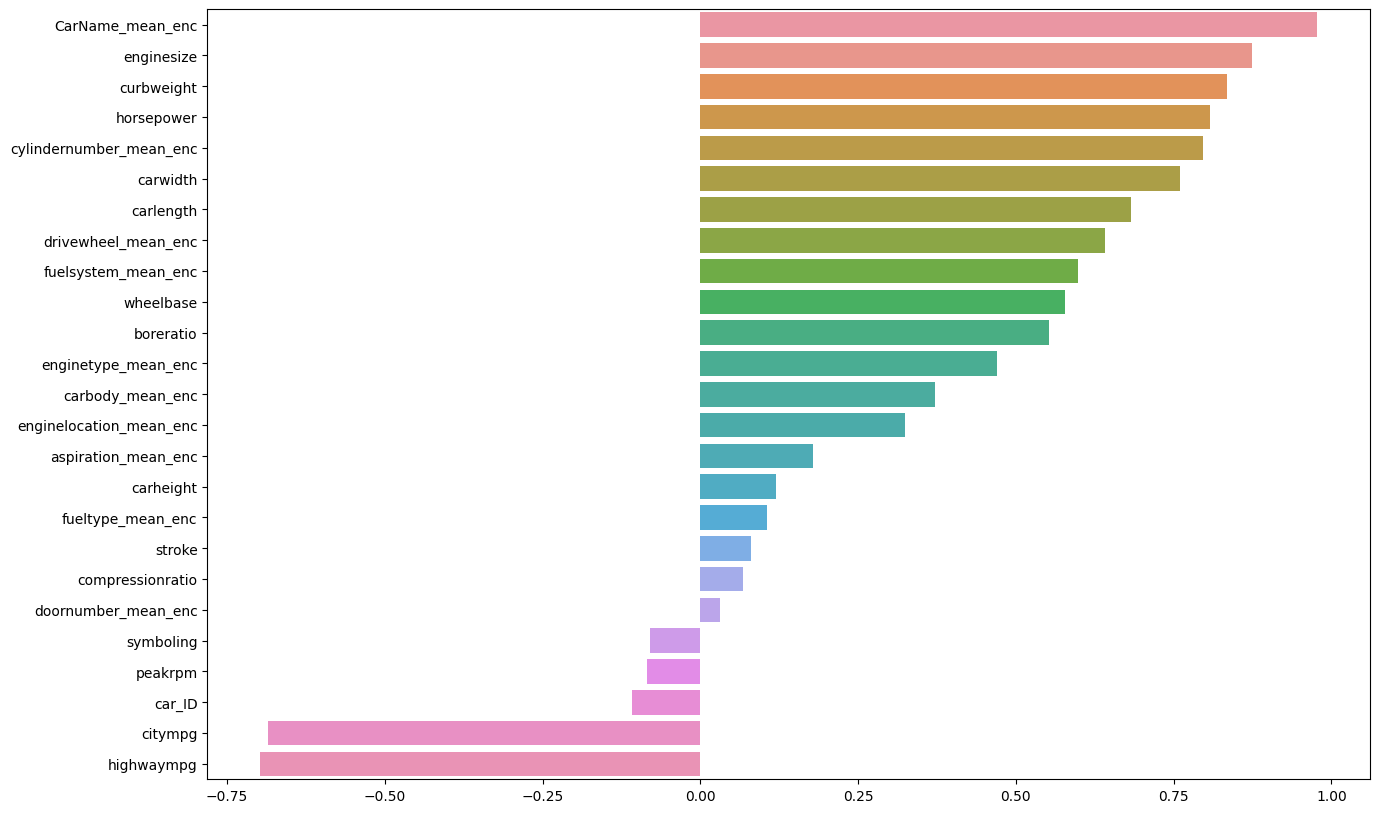

In [13]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Custom gradient boosting

In [31]:
class MyGradientBoosting():
    def __init__(self, max_depth = 10, min_samples_split = 5, min_samples_leaf = 5, 
                 max_features = 3, lr = 0.01, num_iter=500):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_pred = 0

    def __loss(self, y, y_pred):
        loss_f = np.mean((y - y_pred)**2)
        return loss_f

    def __gradient(self, y, y_pred):
        grad = -(y - y_pred)
        return grad

    def __base_model(self, X, y):
        base = DecisionTreeRegressor(criterion='squared_error',max_depth=self.max_depth,
                                     min_samples_split=self.min_samples_split,
                                     min_samples_leaf=self.min_samples_leaf,
                                     max_features=self.max_features)        
        base.fit(X,y)
        return base

    def fit(self, X, y):
        # a0 = mean(y) - первая модель - это просто среднее таргета
        self.y_pred = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y)) # первое дерево
        y_pred = pred_0.reshape(len(pred_0), 1)
        models = []
        losses = []
        for i in range(self.num_iter):
            # 1) сначала считаем ошибку
            loss = self.__loss(y, y_pred)
            losses.append(loss)
            # 2) вычисляем градиент — насколько текущие предсказания далеки от истинных значений
            grads = self.__gradient(y, y_pred)
            # 3) обучаем дерево предсказывать эти градиенты
            base = self.__base_model(X, grads)
            # 4) делаем шаг в сторону уменьшения ошибки
            rate = (base.predict(X)).reshape(len(X), 1) # (n_samples, 1)
            y_pred -= self.lr * rate
            # 5) добавляем дерево в ансамбль
            models.append(base)
            
        return models, losses, pred_0
     

    def predict(self, models, y, X):
        pred_0 = np.array([self.y_pred] * len(X))
        pred = pred_0.reshape(len(pred_0),1)
        
        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            pred -= self.lr * temp

        return pred

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [34]:

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)

In [35]:
gbm = MyGradientBoosting()

models, losses, preds = gbm.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


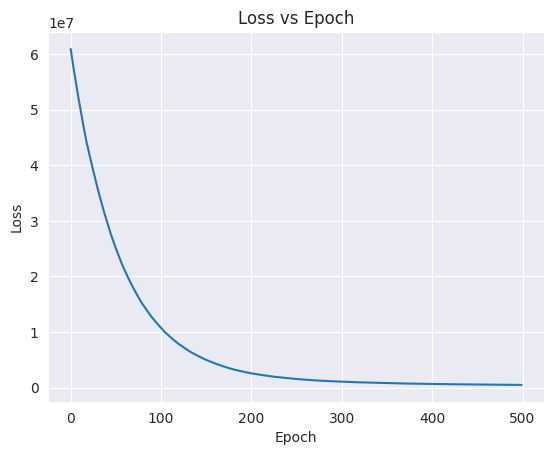

In [36]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(500),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')
None

In [37]:

y_train_pred = gbm.predict(models, y_train, X_train)
y_test_pred = gbm.predict(models, y_train, X_test)

print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))

print('R2:', r2_score(y_train, y_train_pred))
print('R2:', r2_score(y_test, y_test_pred))

MSE: 488987.7355783906
MSE: 4406989.325316003
R2: 0.9919771811819921
R2: 0.9363927422941674
